# LEGO Data Set Exploration and Visualizations
### Emily Weed
Small project exploring the LEGO sets data from [Kaggle](https://www.kaggle.com/rtatman/lego-database) and visualizing them. I will be loosely exploring how LEGO sets have changed over time.

In [3]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading in all the csvs
df_colors = pd.read_csv('colors.csv')
df_sets = pd.read_csv('sets.csv')
df_inv_sets = pd.read_csv('inventory_sets.csv')
df_inv_parts = pd.read_csv('inventory_parts.csv')
df_invs = pd.read_csv('inventories.csv')
df_themes = pd.read_csv('themes.csv')

In [5]:
df_set_invs = pd.merge(df_sets, df_invs, on="set_num", how = "outer")

In [6]:
df_set_invs_parts = pd.merge(df_set_invs, df_inv_parts, left_on = "id", right_on = 'inventory_id', how = "outer")
df_set_invs_parts.head()

,set_num,name,year,theme_id,num_parts,id,version,inventory_id,part_num,color_id,quantity,is_spare
0,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,29c01,4.0,8.0,f
1,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,29c01,15.0,6.0,f
2,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,3001a,15.0,25.0,f
3,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,3001a,4.0,9.0,f
4,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,3001a,1.0,4.0,f


In [8]:
df_sets_and_all_invs = pd.merge(df_set_invs_parts, df_inv_sets, left_on= "id", right_on = "inventory_id", how = "outer")
df_sets_and_all_invs.head()

,set_num_x,name,year,theme_id,num_parts,id,version,inventory_id_x,part_num,color_id,quantity_x,is_spare,inventory_id_y,set_num_y,quantity_y
0,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,29c01,4.0,8.0,f,NaN,NaN,NaN
1,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,29c01,15.0,6.0,f,NaN,NaN,NaN
2,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,3001a,15.0,25.0,f,NaN,NaN,NaN
3,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,3001a,4.0,9.0,f,NaN,NaN,NaN
4,00-1,Weetabix Castle,1970,414,471,5574.0,1.0,5574.0,3001a,1.0,4.0,f,NaN,NaN,NaN


In [9]:
df = pd.merge(df_final, df_themes, left_on = "theme_id", right_on = "id", how = "outer")
df.head()

,set_num_x,name_x,year,theme_id,num_parts,id_x,version,inventory_id_x,part_num,color_id,quantity_x,is_spare,inventory_id_y,set_num_y,quantity_y,id_y,name_y,parent_id
0,00-1,Weetabix Castle,1970.0,414.0,471.0,5574.0,1.0,5574.0,29c01,4.0,8.0,f,NaN,NaN,NaN,414,Castle,411.0
1,00-1,Weetabix Castle,1970.0,414.0,471.0,5574.0,1.0,5574.0,29c01,15.0,6.0,f,NaN,NaN,NaN,414,Castle,411.0
2,00-1,Weetabix Castle,1970.0,414.0,471.0,5574.0,1.0,5574.0,3001a,15.0,25.0,f,NaN,NaN,NaN,414,Castle,411.0
3,00-1,Weetabix Castle,1970.0,414.0,471.0,5574.0,1.0,5574.0,3001a,4.0,9.0,f,NaN,NaN,NaN,414,Castle,411.0
4,00-1,Weetabix Castle,1970.0,414.0,471.0,5574.0,1.0,5574.0,3001a,1.0,4.0,f,NaN,NaN,NaN,414,Castle,411.0


Text(0.5, 1.0, 'Number of Parts per set by Year')

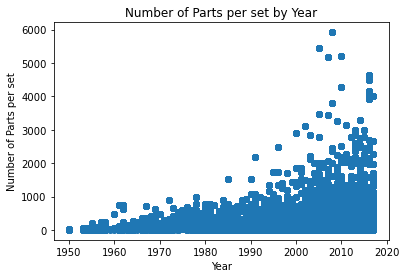

In [11]:
plt.scatter(df['year'], df['num_parts'])

plt.xlabel("Year")
plt.ylabel("Number of Parts per set")
plt.title("Number of Parts per set by Year")

This scatter plot shows that over time, the number of parts in lego sets has definitely increased, especially since around 1985 (looks like exponential growth from then on)

/Users/emilyweed/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/emilyweed/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Number of sets produced over the Years')

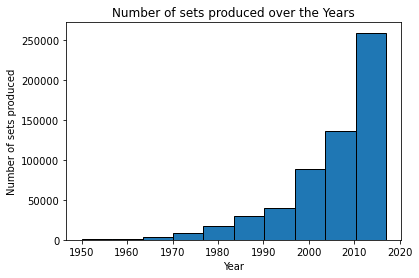

In [12]:
plt.hist(df['year'], edgecolor = 'black')
plt.xlabel("Year")
plt.ylabel("Number of sets produced")
plt.title("Number of sets produced over the Years")

This bar chart shows that over the years the number of sets produced has increased. This is due to the growth in the LEGO company over the years. I can also see that most recently (2010-2017, the last year the data set contains values for) set production has just about doubled. This is interesting because it tells me that LEGO sets are still on the rise and have been continuouslt growing ever since being first produced.

In [17]:
#Filtering out the 10 most popular themes and creating a new dataframe for them
lst = df['name_y'].value_counts()[:10].index.tolist()
print(lst)
df_themes = df[df['name_y'].isin(lst)]

['Basic Set', 'Star Wars Episode 4/5/6', 'Ninjago', 'Friends', 'Creator', 'Police', 'Traffic', 'Construction', 'Airport', 'Star Wars']


In [18]:
df_themes.rename(columns = {'name_y':'Set Theme'}, inplace = True)

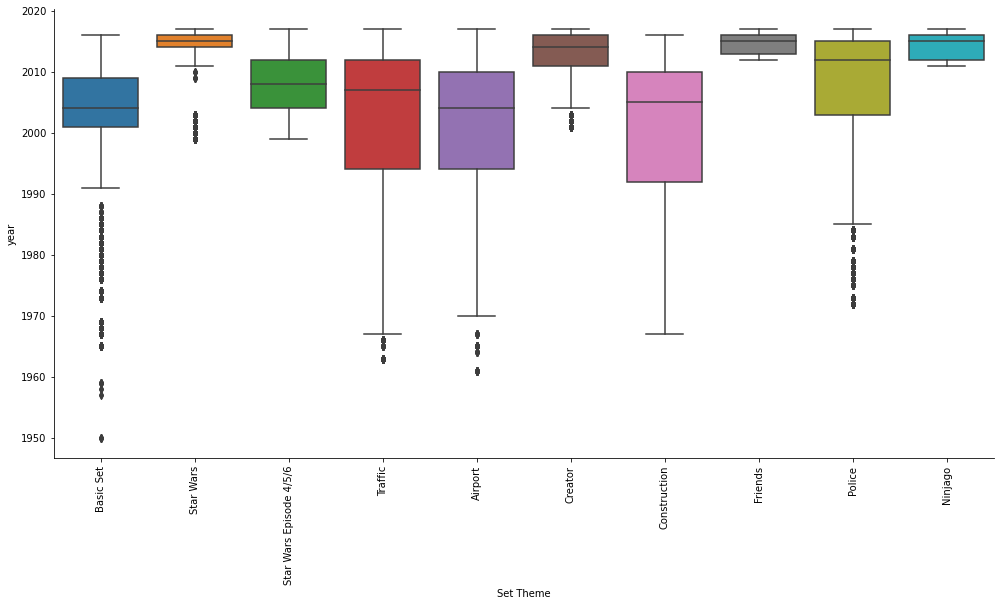

In [19]:
g = sns.catplot(x = 'Set Theme', y = 'year', data = df_themes, height = 7, aspect = 2,   
                kind = 'box')
g.set_xticklabels(rotation=90)

This graph shows boxplots of each set theme produced against the years. To construct this graph I restricted the themes to the top 10 most frequent to be able to get a readable plot. This plot shows us the distribution of years each theme was produced. I can see that the Ninjago themes are much newer (which makes sense because the movie came out in 2011). Additionally it's interesting to analyze the shape of the box plots. For the basic sets, the first quartile is more concentrated than the thrid, meaning more were made during about 2001-2004 than from about 2004-2009. So basic sets were more popular in the early 2000s. I can see a lot from this plot and it would beneficial to make more for other themes.

In [ ]:
fig = plt.gcf()
fig.set_size_inches(14, 10)
pt = sns.scatterplot(y = 'num_parts', x = 'year', data = df_themes, hue = 'Set Theme', s = 100)
plt.title("Number of parts by year colored by Set Theme")
plt.xlabel("Year")
plt.ylabel("Number of parts")
plt.legend(fontsize='x-large')

